In [14]:
import os
os.system("mkdir data_for_vis")
for optim in ["adam","sgd"]:
    for architecture in ["64_10","64-10-10-10","64-10-10"]:
        for metric in ["train_loss","train_acc","test_loss","test_acc"]:
            os.system(f"touch ./data_for_vis/{architecture}-{optim}-{metric}.txt")

for metric in ["train_loss","train_acc","test_loss","test_acc"]:
    os.system(f"touch ./data_for_vis/64-10-sgd-{metric}-history.txt")

c:\Users\mihai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


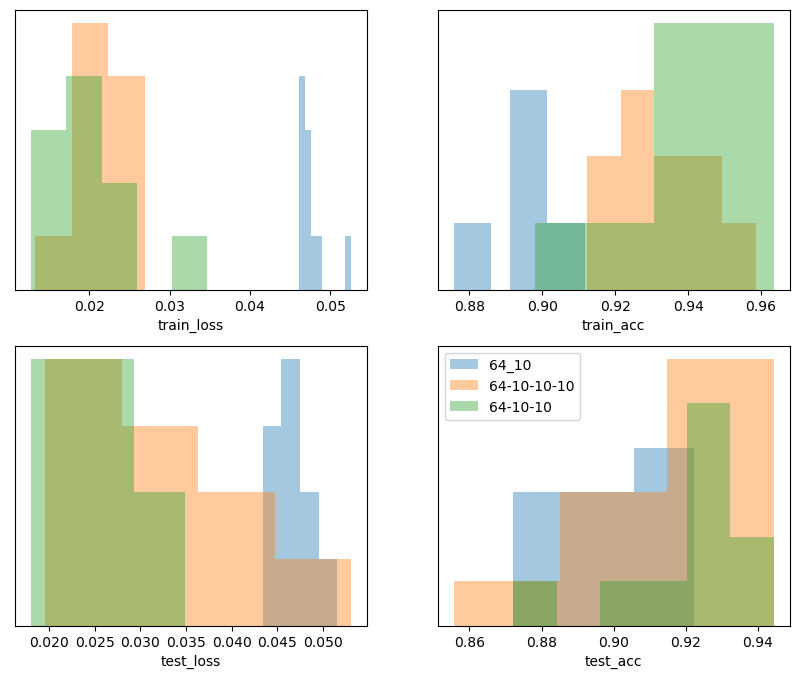

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

for optim in ["sgd"]:
    fig,axs= plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.flatten()
    for i,metric in enumerate(["train_loss","train_acc","test_loss","test_acc"]):
        
        color_map = plt.cm.get_cmap('tab10')
        for j,architecture in enumerate(["64_10","64-10-10-10","64-10-10"]):
            arr=np.loadtxt(f"data_for_vis/{architecture}-{optim}-{metric}.txt")
            sns.distplot(arr, hist=True, kde=False, label=f'{architecture}', ax=axs[i])

            # Calculate KDE
            # kde = gaussian_kde(arr)
            # x_vals = np.linspace(np.min(arr), np.max(arr), 100)
            # y_vals = kde(x_vals)

            # Plot KDE curve
            # ax.plot(x_vals, y_vals, label=f'KDE {i+1}')
        # Set labels and legend
        axs[i].set_xlabel(f'{metric}')
        axs[i].set_ylabel('')
        axs[i].set_yticks([])
    plt.legend()
    plt.show()

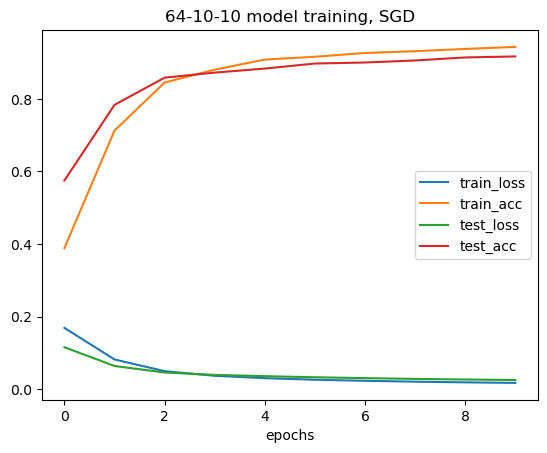

In [7]:
optim="sgd"
architecture="64-10-10"
color_map = plt.cm.get_cmap('tab10')
for i,metric in enumerate(["train_loss","train_acc","test_loss","test_acc"]):
  arr=np.loadtxt(f"data_for_vis/{architecture}-{optim}-{metric}-history.txt")
  plt.plot(arr,label=metric)
plt.xlabel("epochs")
plt.title("64-10-10 model training, SGD")
plt.legend()
plt.show()

Text(0.5, 1.0, '64-10-10 model - labels vs predictions')

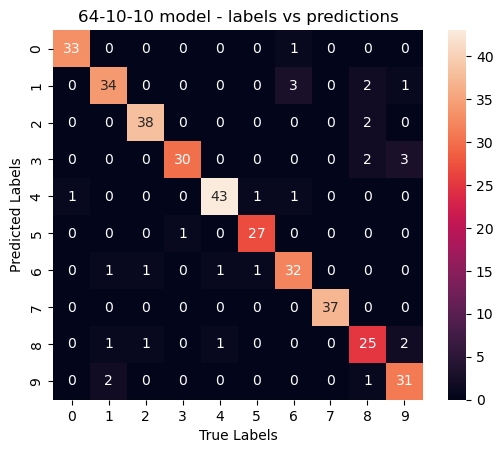

In [23]:
optim="sgd"
architecture="64-10-10"
confusion_matrix=np.loadtxt(f"data_for_vis/{architecture}-{optim}-confusion_matrix.txt")
fig, ax = plt.subplots()

# Plot the confusion matrix as a heatplot
sns.heatmap(confusion_matrix, annot=True, square=True, ax=ax)

# Set labels and title
ax.set_xlabel('True Labels')
ax.set_ylabel('Predicted Labels')
ax.set_title(f'{architecture} model - labels vs predictions')

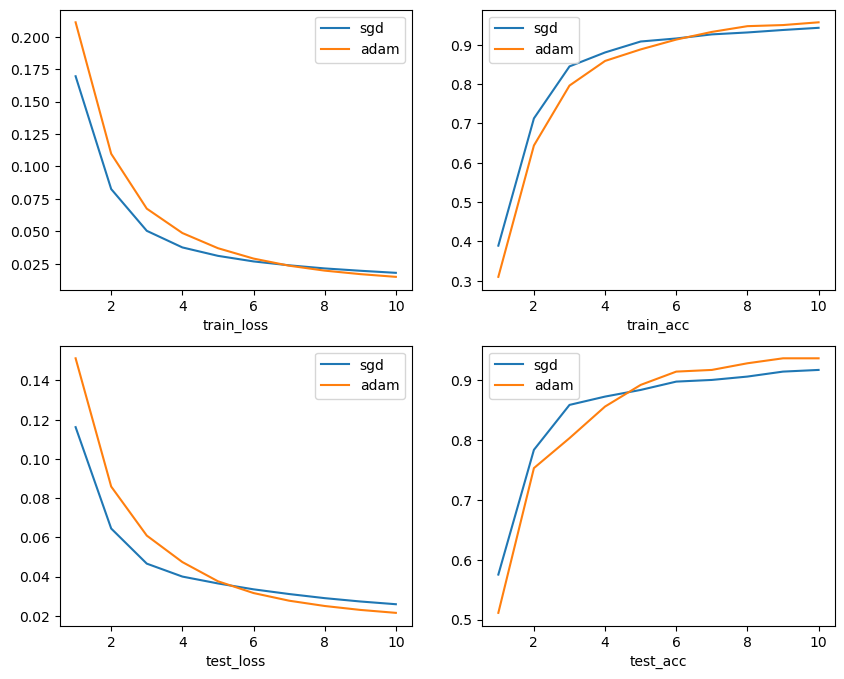

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


color_map = plt.cm.get_cmap('tab10')
for architecture in ["64-10-10"]:
    fig,axs= plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.flatten()
    epochs=range(1,11)
    for i,metric in enumerate(["train_loss","train_acc","test_loss","test_acc"]):
        # for j,optim in enumerate(["sgd","adam"]):
        #adam is classifying everything as a 5 for some reason???
        for j,optim in enumerate(["sgd","adam"]):
            arr=np.loadtxt(f"data_for_vis/{architecture}-{optim}-{metric}-history.txt")
            sns.lineplot(x=epochs,y=arr, label=optim, ax=axs[i])

            # Calculate KDE
            # kde = gaussian_kde(arr)
            # x_vals = np.linspace(np.min(arr), np.max(arr), 100)
            # y_vals = kde(x_vals)

            # Plot KDE curve
            # ax.plot(x_vals, y_vals, label=f'KDE {i+1}')
        # Set labels and legend
        axs[i].set_xlabel(f'{metric}')
    plt.legend()
    plt.show()